<a id='Haut de page'></a>

# <font color="#8333ff">P6: Détectez des faux billets</font>

---

## Sommaire

[Mission 0 : description des données (analyses univariées et bivariées)](#Mission 0)  
[Mission 1 : analyse en composantes principales](#Mission 1)  
[Mission 2 : K-means](#Mission 2)  
[Mission 3 : régression logistique](#Mission 3)

---

<a id='Mission 0'></a>

# <font color='#FFCA36'>Mission 0</font>

# Brève description des données (analyses univariées et bivariées).

In [1]:
# Import des librairies
import numpy as np
print(f"numpy version {np.__version__}")
import pandas as pd
print(f"pandas version {pd.__version__}")
import matplotlib.pyplot as plt
import seaborn as sns
print(f"seaborn version {sns.__version__}")

import warnings
warnings.filterwarnings("ignore")

numpy version 1.19.0
pandas version 1.0.3
seaborn version 0.8.1


In [2]:
# Import des données
billets = pd.read_csv("C:/Users/Zang/Documents/APPRENDER/OPENCLASSROOMS/PARCOURS DA/P6_Detectez_des_faux_billets/notes.csv")

## Vérification des données

In [3]:
billets.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55


In [3]:
billets.shape

(170, 7)

In [5]:
billets.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,171.940588,104.066353,103.928118,4.612118,3.170412,112.570412
std,0.305768,0.298185,0.330980,0.702103,0.236361,0.924448
min,171.040000,103.230000,103.140000,3.540000,2.270000,109.970000
25%,171.730000,103.842500,103.690000,4.050000,3.012500,111.855000
50%,171.945000,104.055000,103.950000,4.450000,3.170000,112.845000
75%,172.137500,104.287500,104.170000,5.127500,3.330000,113.287500
max,173.010000,104.860000,104.950000,6.280000,3.680000,113.980000


In [294]:
billets.describe(include='all')

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
count,170,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN
top,True,NaN,NaN,NaN,NaN,NaN,NaN
freq,100,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,171.940588,104.066353,103.928118,4.612118,3.170412,112.570412
std,NaN,0.305768,0.298185,0.330980,0.702103,0.236361,0.924448
min,NaN,171.040000,103.230000,103.140000,3.540000,2.270000,109.970000
25%,NaN,171.730000,103.842500,103.690000,4.050000,3.012500,111.855000
50%,NaN,171.945000,104.055000,103.950000,4.450000,3.170000,112.845000
75%,NaN,172.137500,104.287500,104.170000,5.127500,3.330000,113.287500


In [6]:
# Affichage des valeurs nulles s'il y en a
billets.isnull().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

In [296]:
billets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    170 non-null    bool   
 1   diagonal      170 non-null    float64
 2   height_left   170 non-null    float64
 3   height_right  170 non-null    float64
 4   margin_low    170 non-null    float64
 5   margin_up     170 non-null    float64
 6   length        170 non-null    float64
dtypes: bool(1), float64(6)
memory usage: 8.3 KB


Le dataset contient **170 billets**. 
- 100 vrais billets 
- 70 faux billets  

**7 variables** : 
- diagonal
- height_left
- height_right
- margin_low
- margin_up
- length  
- is_genuine

Aucune valeur nulle. 

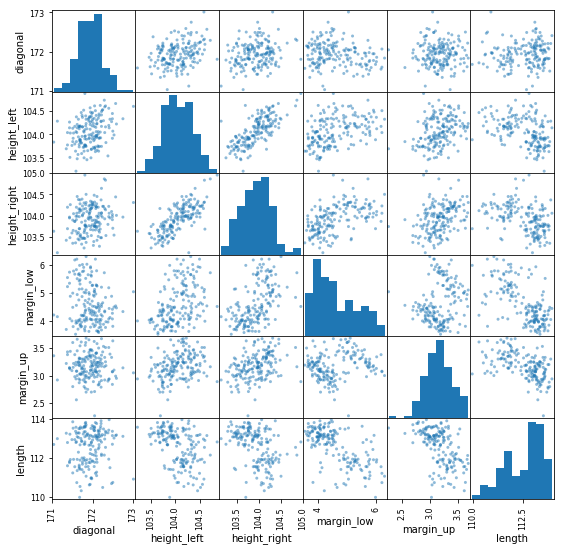

In [5]:
# Graphique - croisement deux à deux des variables
from pandas.plotting import scatter_matrix

scatter_matrix(billets.drop('is_genuine', axis=1), figsize=(9,9))

# plt.show()
plt.savefig('fig1.jpeg')

In [298]:
# Matrice de corrélation (Pearson)
billets.drop('is_genuine', axis=1).corr()

,diagonal,height_left,height_right,margin_low,margin_up,length
diagonal,1.000000,0.319584,0.220418,-0.181020,-0.027366,0.080295
height_left,0.319584,1.000000,0.734390,0.424530,0.324788,-0.421387
height_right,0.220418,0.734390,1.000000,0.509375,0.366918,-0.417021
margin_low,-0.181020,0.424530,0.509375,1.000000,0.171113,-0.637352
margin_up,-0.027366,0.324788,0.366918,0.171113,1.000000,-0.525284
length,0.080295,-0.421387,-0.417021,-0.637352,-0.525284,1.000000


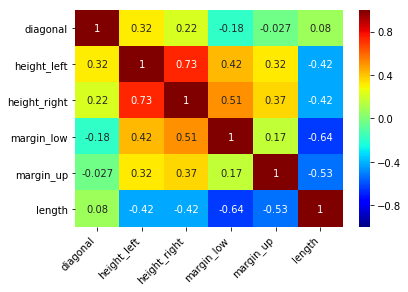

In [11]:
# Heatmap de la matrice de corrélation de Pearson
ax = sns.heatmap(billets.drop('is_genuine', axis=1).corr(), annot=True, vmin=-1, vmax=1, cmap='jet')
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

# plt.show()
plt.savefig('fig2.jpeg')

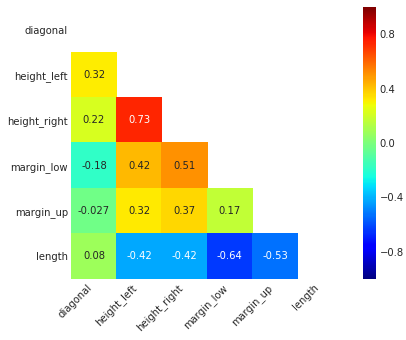

In [10]:
# Heatmap de la matrice de corrélation de Pearson (représentation différente, données identiques)
corr = billets.drop('is_genuine', axis=1).corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, square=True, annot=True, cmap='jet')

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

# plt.show()
plt.savefig('fig2b.jpeg')

Peu de remarques à faire à ce stade. Height left et right sont corrélées, ce qui parait normal. 

### Différencier les vrais et les faux billets : visualisation et tests statistiques

Je créé des df billets_vrais et billets_faux pour faciliter la création de graphiques.

In [22]:
billets_vrais = billets[billets['is_genuine'] == True]

In [7]:
billets_vrais.shape

(100, 7)

In [10]:
billets_vrais.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,171.976100,103.951500,103.775900,4.143500,3.055500,113.207200
std,0.307981,0.296251,0.292406,0.314509,0.197726,0.380476
min,171.040000,103.230000,103.140000,3.540000,2.270000,111.760000
25%,171.790000,103.740000,103.557500,3.900000,2.937500,112.995000
50%,172.005000,103.915000,103.760000,4.080000,3.070000,113.210000
75%,172.162500,104.145000,103.972500,4.382500,3.192500,113.505000
max,172.750000,104.860000,104.950000,5.040000,3.530000,113.980000


In [23]:
billets_faux = billets[billets['is_genuine'] == False]

In [12]:
billets_faux.shape

(70, 7)

In [13]:
billets_faux.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,171.889857,104.230429,104.145571,5.281571,3.334571,111.660714
std,0.297426,0.213130,0.253152,0.540846,0.185102,0.676931
min,171.380000,103.780000,103.440000,3.820000,2.980000,109.970000
25%,171.682500,104.082500,103.982500,4.952500,3.185000,111.270000
50%,171.875000,104.215000,104.170000,5.265000,3.335000,111.765000
75%,172.047500,104.377500,104.280000,5.702500,3.450000,111.985000
max,173.010000,104.720000,104.860000,6.280000,3.680000,113.640000


In [14]:
billets.groupby('is_genuine').mean()

,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,,,,,,
False,171.889857,104.230429,104.145571,5.281571,3.334571,111.660714
True,171.976100,103.951500,103.775900,4.143500,3.055500,113.207200


#### Boxplots

Les boxplots permettent de visualiser les écarts entre vrais et faux billets.

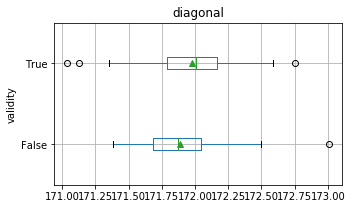

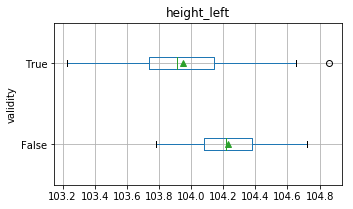

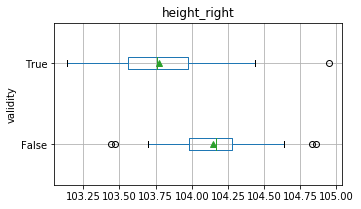

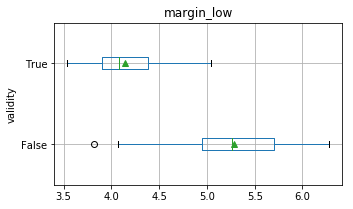

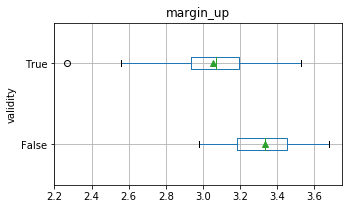

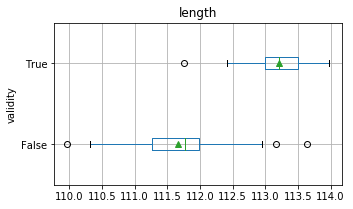

In [6]:
# Boucle for pour obtenir rapidement et facilement toutes les bp
graph = billets.drop('is_genuine', axis=1)

for column_b in graph.columns:
    boxplot = billets.boxplot(column = column_b, by = 'is_genuine', showmeans = 'True', vert = 0, figsize = (5,3))
    plt.suptitle('')
    plt.xlabel('')
    plt.ylabel('validity')

# plt.savefig('fig3.jpeg')

#### Histogrammes des dimensions des billets

##### Diagonal

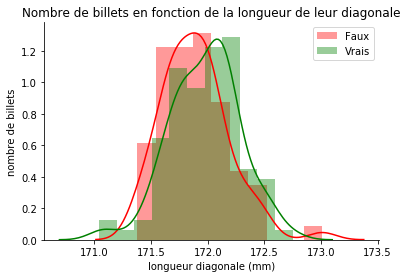

In [19]:
# cf. https://github.com/OpenClassrooms-Student-Center/Design-Statistical-Models/blob/master/P1CH4_01%20Hypothesis%20Testing%20The%20T-test.ipynb
sns.distplot(billets_faux.diagonal, color = 'r', label = 'Faux')
sns.distplot(billets_vrais.diagonal, color = 'g', label = 'Vrais')
plt.legend()
plt.title('Nombre de billets en fonction de la longueur de leur diagonale')
plt.xlabel('longueur diagonale (mm)')
plt.ylabel('nombre de billets')
sns.despine()

# plt.savefig('fig4.jpeg')

In [51]:
# from scipy import stats

In [8]:
ttest1 = stats.ttest_ind(billets_faux.diagonal, billets_vrais.diagonal)
print(ttest1)

Ttest_indResult(statistic=-1.8222865515506024, pvalue=0.07018967008887296)


H0 : les billets vrais et faux ont la même diagonale.   
p > 0.05 on ne peut donc pas rejeter H0. La différence des diagonales **n'est pas statistiquement significative.** 

##### Height left

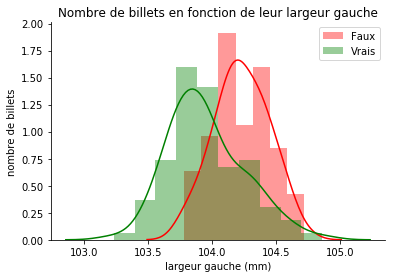

In [20]:
sns.distplot(billets_faux.height_left, color = 'r', label = 'Faux')
sns.distplot(billets_vrais.height_left, color = 'g', label = 'Vrais')
plt.legend()
plt.title('Nombre de billets en fonction de leur largeur gauche')
plt.xlabel('largeur gauche (mm)')
plt.ylabel('nombre de billets')
sns.despine()

plt.savefig('fig5.jpeg')

In [11]:
ttest2 = stats.ttest_ind(billets_faux.height_left,billets_vrais.height_left)
print(ttest2)

Ttest_indResult(statistic=6.746974258787215, pvalue=2.3342002888499904e-10)


La différence entre les largeurs gauches **est statistiquement significative**. 

##### Height right

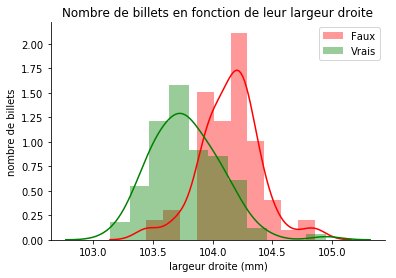

In [21]:
sns.distplot(billets_faux.height_right, color = 'r', label = 'Faux')
sns.distplot(billets_vrais.height_right, color = 'g', label = 'Vrais')
plt.legend()
plt.title('Nombre de billets en fonction de leur largeur droite')
plt.xlabel('largeur droite (mm)')
plt.ylabel('nombre de billets')
sns.despine()

plt.savefig('fig6.jpeg')

In [12]:
ttest3 = stats.ttest_ind(billets_faux.height_right,billets_vrais.height_right)
print(ttest3)

Ttest_indResult(statistic=8.564989194564754, pvalue=6.665246409290165e-15)


La différence entre les largeurs droites **est statistiquement significative**. 

##### Marges basses

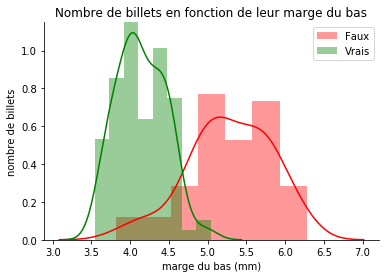

In [22]:
sns.distplot(billets_faux.margin_low, color = 'r', label = 'Faux')
sns.distplot(billets_vrais.margin_low, color = 'g', label = 'Vrais')
plt.legend()
plt.title('Nombre de billets en fonction de leur marge du bas')
plt.xlabel('marge du bas (mm)')
plt.ylabel('nombre de billets')
sns.despine()

plt.savefig('fig7.jpeg')

In [13]:
ttest4 = stats.ttest_ind(billets_faux.margin_low,billets_vrais.margin_low)
print(ttest4)

Ttest_indResult(statistic=17.288623485750918, pvalue=3.940145276272617e-39)


La différence entre les largeurs droites **est statistiquement significative**. 

##### Marges hautes

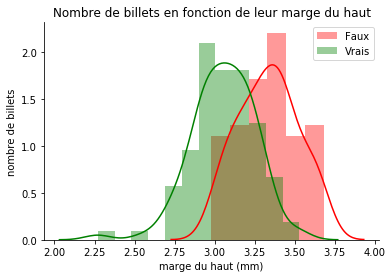

In [23]:
sns.distplot(billets_faux.margin_up, color = 'r', label = 'Faux')
sns.distplot(billets_vrais.margin_up, color = 'g', label = 'Vrais')
plt.legend()
plt.title('Nombre de billets en fonction de leur marge du haut')
plt.xlabel('marge du haut (mm)')
plt.ylabel('nombre de billets')
sns.despine()
plt.savefig('fig8.jpeg')

In [14]:
ttest5 = stats.ttest_ind(billets_faux.margin_up,billets_vrais.margin_up)
print(ttest5)

Ttest_indResult(statistic=9.295866009945723, pvalue=7.567386063614238e-17)


La différence entre les largeurs droites **est statistiquement significative**. 

##### Longueurs

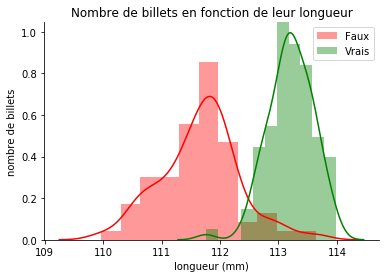

In [24]:
sns.distplot(billets_faux.length, color = 'r', label = 'Faux')
sns.distplot(billets_vrais.length, color = 'g', label = 'Vrais')
plt.legend()
plt.title('Nombre de billets en fonction de leur longueur')
plt.xlabel('longueur (mm)')
plt.ylabel('nombre de billets')
sns.despine()
plt.savefig('fig9.jpeg')

In [15]:
ttest6 = stats.ttest_ind(billets_faux.length,billets_vrais.length)
print(ttest6)

Ttest_indResult(statistic=-18.975090930566722, pvalue=1.2348226459862946e-43)


La différence entre les largeurs droites **est statistiquement significative**. 

**Conclusion :**
    
Mise à part la diagonale, toutes les autres dimensions sont **statistiquement significatives.** 

[Haut de page](#Mission 0)  

<a id='Mission 1'></a>

# <font color='#FFCA36'>Mission 1 : ACP</font>

Analyse en composantes principales de l'échantillon, en suivant toutes ces étapes :  

- analyse de l'éboulis des valeurs propres ;  
- représentation des variables par le cercle des corrélations ;  
- représentation des individus par les plans factoriels ;  
- analyser de la qualité de représentation et la contribution des individus.  

La variable donnant la nature Vrai/Faux du billet sera utilisée comme variable illustrative.

Cf. ici par ex : https://openclassrooms.com/fr/courses/4525281-realisez-une-analyse-exploratoire-de-donnees/5345201-tp-realisez-une-acp

## Analyse de l'éboulis des valeurs propres 

In [9]:
# Fonctions créées pour ce projet
from functions import *

from sklearn import decomposition, preprocessing
# Pour l'ACP
from sklearn.decomposition import PCA
# Classe pour standardisation 
from sklearn.preprocessing import StandardScaler

##### Préparation des données pour l'ACP

In [26]:
# Rappel du df principal
billets.head(2)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29


In [4]:
# Copie du df principal
X = billets.copy()

In [5]:
# Remplaçons True par 1 et False par 0
X.is_genuine = X.is_genuine * 1 

In [6]:
# Plaçons is_genuine en index
X.set_index('is_genuine', inplace = True)

In [7]:
# "is_genuine" sera la variable illustrative
is_genuine = X.index

##### Centrage et réduction

In [10]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

---

##### Vérifions, par acquis de conscience, les propriétés du nouvel ensemble de données.

In [10]:
# Les moyennes sont maintenant nulles (aux erreurs de troncature près) :
np.mean(X_scaled, axis=0)

array([ 7.69580478e-15,  3.14728635e-14,  3.61958829e-14,  7.52339367e-16,
       -1.50467873e-15, -1.37510918e-14])

In [11]:
# Et les écarts-type unitaires.
np.std(X_scaled, axis = 0)

array([1., 1., 1., 1., 1., 1.])

Nous sommes maintenant parés pour lancer l’ACP.

---

In [16]:
# Choix du nombre de composantes à calculer
n_comp = len(X.columns)

# Calcul des composantes principales
pca = decomposition.PCA(n_components = n_comp)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

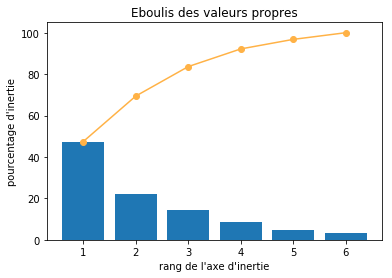

Pourcentage de variance expliquée : [47.45 21.96 14.23  8.53  4.61  3.22]
Pourcentage de variance expliquée (somme cumulative) : [ 47.45  69.41  83.64  92.17  96.78 100.  ]


<Figure size 432x288 with 0 Axes>

In [35]:
# Éboulis des valeurs propres
display_scree_plot(pca) 
print(f"Pourcentage de variance expliquée :", np.around((pca.explained_variance_ratio_ * 100), 2))
print(f"Pourcentage de variance expliquée (somme cumulative) :", np.around((pca.explained_variance_ratio_.cumsum() * 100), 2))

# plt.savefig('fig10.jpeg')

La première composante accapare presque la moitié de l’information disponible.

_**Rappel du critère de Kaiser** : on a tendance à ne pas considérer comme importants les axes dont l’inertie associée est inférieure à (100/p)% avec p étant le nombre d'axes. Sachant qu'en pratique, on retient en fait les axes que l’on sait interpréter.   
Ici 100/p = 100/6 = 17%.  
Selon cette règle, on ne garde que les 2 1ers axes._ 

---

##### --- Représentation des variables sur PC1 et PC2 : ---

In [36]:
# Je récupère les contributions
pc1 = pca.components_[0] 
pc2 = pca.components_[1] 
# Rappel des variables
print(X.columns)
# Score de représentation des variables sur PC1 : 
print(f'pc1 : {pc1}')
print(f'pc2 : {pc2}')

Index(['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up',
       'length'],
      dtype='object')
pc1 : [ 0.07327499  0.47550205  0.4918214   0.43102671  0.35253984 -0.46537288]
pc2 : [ 0.77963908  0.33925019  0.23554253 -0.32053699 -0.14111974  0.31453645]


- height_right, height_left, length (-), margin_low sont les variables qui contribuent le plus à PC1. 
- diagonal contribue le plus à PC2. 

In [37]:
# Récupérons les autres contributions
pc3 = pca.components_[2] 
pc4 = pca.components_[3] 
pc5 = pca.components_[4] 
pc6 = pca.components_[5] 

In [38]:
# Je créé un df pour une meilleure compréhension
data = {'pc1': pc1,
        'pc2': pc2,
        'pc3': pc3,
        'pc4': pc4,
        'pc5': pc5,
        'pc6': pc6,
        
        }

df = pd.DataFrame(data, X.columns)
df

# corrMatrix = df.corr()
# print (corrMatrix)

,pc1,pc2,pc3,pc4,pc5,pc6
diagonal,0.073275,0.779639,-0.088894,-0.559732,-0.225094,0.122166
height_left,0.475502,0.339250,0.122760,0.278046,0.715921,0.232131
height_right,0.491821,0.235543,0.153830,0.458938,-0.486993,-0.480813
margin_low,0.431027,-0.320537,0.512808,-0.226528,-0.311908,0.547630
margin_up,0.352540,-0.141120,-0.821149,0.135340,-0.193943,0.354380
length,-0.465373,0.314536,0.126913,0.573703,-0.254417,0.523951


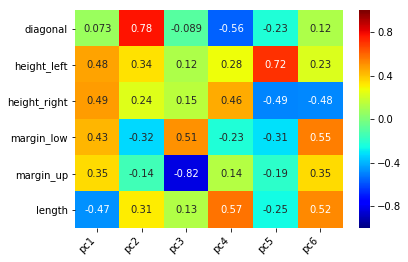

In [42]:
ax = sns.heatmap(
    df, 
    annot = True, 
    vmin = -1, vmax = 1,
    cmap = 'jet'
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

# plt.savefig('fig10b.jpeg')

Vérifions ces informations avec le cercle des corrélations.

---

## Représentation des variables et des individus

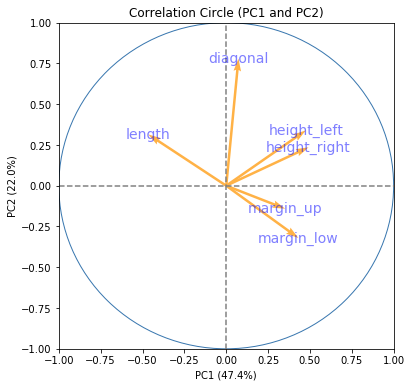

<Figure size 432x288 with 0 Axes>

In [18]:
# Cercle des corrélations
pcs = pca.components_ 
display_circles(pcs, n_comp, pca, [(0,1)], labels = X.columns)

# plt.savefig('fig11.jpeg')

In [17]:
# Projection des individus sur le 1er plan factoriel
X_projected = pca.transform(X_scaled)

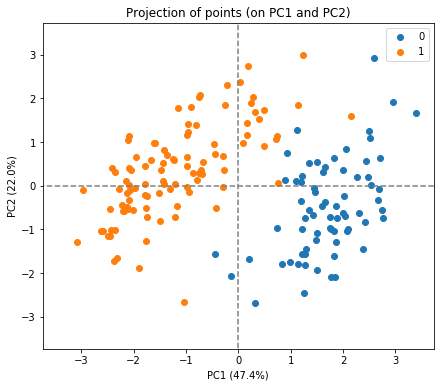

In [57]:
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], illustrative_var = is_genuine)

# plt.savefig('fig12.jpeg')

**Observations et analyses :** 
 
- Les vrais et faux billets sont très clairement séparés en 2 groupes. 
- PC1 représente les dimensions des billets : longueur vs hauteurs et marges. 
- P2 représente la longueur de la diagonale. 
- PC1 explique presque la moitié de l'inertie et va permettre de déterminer la validité du billet, avec PC2 pour les valeurs proches de 0.  
- En bref : les vrais billets ont des longueurs plus importantes, les faux billets ont des hauteurs et des marges plus importantes. Cela correspond à ce que nous observons sur les graphiques.

 ## Analyse de la qualité de représentation et la contribution des individus

cf. 
- https://openclassrooms.com/fr/courses/4525281-realisez-une-analyse-exploratoire-de-donnees/5278723-interpretez-le-cercle-des-correlations
- http://eric.univ-lyon2.fr/~ricco/tanagra/fichiers/fr_Tanagra_ACP_Python.pdf
- https://www.fun-mooc.fr/c4x/agrocampusouest/40001S03/asset/AnaDo_ACP_cours_slides.pdf

### Contribution des individus dans l'inertie totale

_Inertie = la quantité d’information contenue dans un tableau de données._

In [84]:
# nombre d'observations
n = X.shape[0] 
# nombre de variables
p =  X.shape[1]
n, p

(170, 6)

In [85]:
# Variance expliquée (cf. éboulis des valeurs propres)
eigval = pca.singular_values_**2/n
print(eigval)

[2.84687523 1.31742636 0.85407146 0.51157773 0.27676935 0.19327987]


In [86]:
# Calcul des carrés des distances à l’origine des individus 
# (qui correspondent également à leur contribution dans l’inertie totale)
di = np.sum(X_scaled**2, axis=1)
# Je créé un df
cont = pd.DataFrame({'is_genuine':X.index, 'di': di})   

##### Individus contribuant le plus / le moins à l'inertie totale : 

In [89]:
# Individus avec le plus de contribution à l'inertie totale
print('Plus grandes contributions')
display(cont.sort_values(by = 'di', ascending=False).head())
# Individus avec le moins de contribution à l'inertie totale
display(cont.sort_values(by = 'di', ascending=False).tail())

,is_genuine,di
166,0,20.625650
0,1,18.410598
4,1,18.039567
122,0,16.790944
39,1,15.052608


,is_genuine,di
59,1,1.484454
76,1,1.435202
85,1,1.431664
98,1,0.878319
64,1,0.813929


In [93]:
# Moyenne di
round(cont.di.mean(), 2)

6.0

In [102]:
cont.loc[cont['di']>=6,:].sort_values(by = 'di', ascending=False)

,is_genuine,di
166,0,20.625650
0,1,18.410598
4,1,18.039567
122,0,16.790944
39,1,15.052608
...,...,...
117,0,6.120816
149,0,6.095229
31,1,6.092514
21,1,6.020373


In [103]:
(cont.loc[cont['di']>=6,:].sort_values(by = 'di', ascending=False)).groupby('is_genuine').count()

,di
is_genuine,
0,38
1,32


On peut dire que 70 billets contribuent plus à l'inertie totale, 38 faux et 32 vrais. 

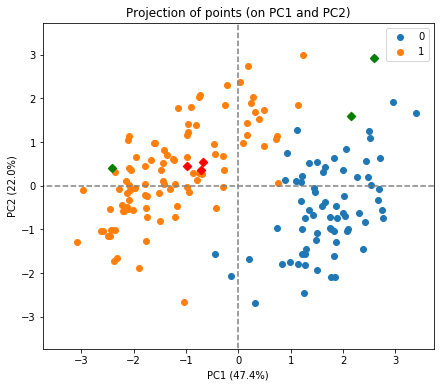

In [98]:
# Visualisation sur le 1er plan factoriel des variables contribuant le plus / moins à l'inertie totale
display_factorial_planes(X_projected, n_comp, pca, 
                         [(0,1)],
                         illustrative_var = is_genuine)
plt.scatter(X_projected[166,0], X_projected[166,1], marker = 'D', c = 'g')
plt.scatter(X_projected[0,0], X_projected[0,1], marker = 'D', c = 'g')
plt.scatter(X_projected[4,0], X_projected[4,1], marker = 'D', c = 'g')
plt.scatter(X_projected[64,0], X_projected[64,1], marker = 'D', c = 'r')
plt.scatter(X_projected[98,0], X_projected[98,1], marker = 'D', c = 'r')
plt.scatter(X_projected[85,0], X_projected[85,1], marker = 'D', c = 'r')
                       
plt.savefig('fig13.jpeg')

### Qualité de représentation des individus - COS²

Les points les plus intéressants sont généralement ceux qui sont assez proches d'un des axes, et assez loin de l'origine. Ces points sont bien correlés avec cet axe et sont les points explicatifs pour l'axe : Ce sont les points les plus "parlants" ; leur "vraie distance" de l'origine est bien représentée sur le plan factoriel.
. 

**Rappel:**  Lorsque l’angle est proche de 0, c'est-à-dire que le cosinus est proche de 1, l’individu est bien représenté, la position du point peut être interprétée. Dans le cas inverse, l’angle est proche de 90° et le cosinus est proche de 0. 

In [27]:
cos2 = X_projected**2
for j in range(p):
    cos2[:,j] = 100 * cos2[:,j]/di # 100 pour faciliter la visualisation
    
# Création d'un df
qualrep = pd.DataFrame(
    np.around(cos2, 1),
    index = X.index,
    columns = ['COS2_' + str(i + 1) for i in range(p)]).reset_index()

qualrep.head()

,is_genuine,COS2_1,COS2_2,COS2_3,COS2_4,COS2_5,COS2_6
0,1,25.2,13.9,17.4,32.2,2.7,8.7
1,1,81.8,5.1,5.4,2.2,0.1,5.4
2,1,78.5,0.0,14.9,2.8,3.6,0.1
3,1,88.3,0.2,5.9,5.6,0.0,0.0
4,1,32.0,0.9,61.1,3.9,1.0,1.1


In [28]:
# Vérification que conformément à la théorie, pour chaque individu, la somme des COS² sur l’ensemble des facteurs est = à 1 (*100 ici)
print(np.sum(cos2,axis=1))

[100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100.]


#### Qualité de représentation sur le 1er plan factoriel

In [29]:
# On additionne les cos² des 2 axes
qualreptop = qualrep[['is_genuine', 'COS2_1', 'COS2_2']].copy()
qualreptop['qualrep_1er_plan'] = qualreptop['COS2_1'] + qualreptop['COS2_2']
print('Meilleure qualité')
display(qualreptop.sort_values(by='qualrep_1er_plan', ascending=False).head())
print('Moins bonne qualité')
display(qualreptop.sort_values(by='qualrep_1er_plan', ascending=False).tail())

Meilleure qualité


,is_genuine,COS2_1,COS2_2,qualrep_1er_plan
148,0,57.8,41.1,98.9
143,0,97.3,0.8,98.1
46,1,96.2,0.3,96.5
45,1,63.1,33.1,96.2
154,0,54.3,41.8,96.1


Moins bonne qualité


,is_genuine,COS2_1,COS2_2,qualrep_1er_plan
52,1,7.7,10.6,18.3
88,1,2.3,13.6,15.9
160,0,6.9,4.3,11.2
43,1,3.9,6.3,10.2
35,1,2.5,0.0,2.5


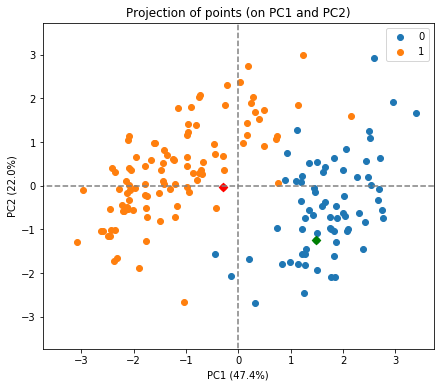

In [72]:
# Visualisation des points les mieux et les moins bien représentés sur le 1er plan factoriel
display_factorial_planes(X_projected, n_comp, pca, 
                         [(0,1)],
                         illustrative_var = is_genuine)
plt.scatter(X_projected[148,0], X_projected[148,1], marker='D', c='g')
plt.scatter(X_projected[35,0], X_projected[35,1], marker='D', c='r')
                          
plt.savefig('fig15.jpeg')

#### Qualité de représentation sur chaque axe

##### Sur l'axe d'inertie principal

In [31]:
# individus avec la meilleure et la moins bonne qualité de représentation sur l'axe d'inertie principal
print('Meilleure qualité')
display(qualreptop.sort_values(by='COS2_1', ascending = False).head())
print('Moins bonne qualité')
display(qualreptop.sort_values(by='COS2_1', ascending = False).tail())

Meilleure qualité


,is_genuine,COS2_1,COS2_2,qualrep_1er_plan
143,0,97.3,0.8,98.1
46,1,96.2,0.3,96.5
101,0,90.8,3.8,94.6
94,1,90.6,4.6,95.2
123,0,90.5,4.7,95.2


Moins bonne qualité


,is_genuine,COS2_1,COS2_2,qualrep_1er_plan
12,1,0.5,36.7,37.2
34,1,0.4,89.1,89.5
152,0,0.3,68.1,68.4
27,1,0.2,23.5,23.7
21,1,0.0,93.6,93.6


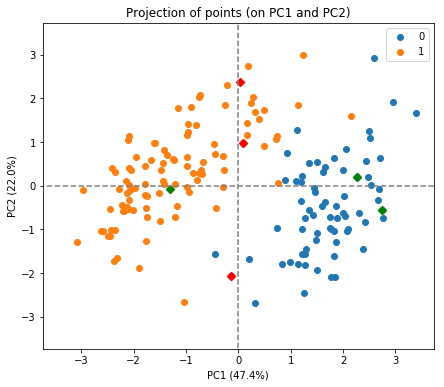

In [28]:
# Visualisation des points les mieux et les moins bien représentés sur l'axe d'inertie principale
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, 
                         [(0,1)],
                         illustrative_var = is_genuine)
plt.scatter(X_projected[143,0], X_projected[143,1], marker='D', c='g')
plt.scatter(X_projected[46,0], X_projected[46,1], marker='D', c='g')
plt.scatter(X_projected[101,0], X_projected[101,1], marker='D', c='g')
plt.scatter(X_projected[21,0], X_projected[21,1], marker='D', c='r')
plt.scatter(X_projected[27,0], X_projected[27,1], marker='D', c='r')
plt.scatter(X_projected[152,0], X_projected[152,1], marker='D', c='r')
                          
plt.savefig('fig16.jpeg')

##### Sur l'axe d'inertie secondaire

In [34]:
# individus avec la meilleure et la moins bonne qualité de représentation sur l'axe d'inertie secondaire
print('Meilleure qualité')
display(qualreptop.sort_values(by='COS2_2', ascending = False).head())
print('Moins bonne qualité')
display(qualreptop.sort_values(by='COS2_2', ascending = False).tail())

Meilleure qualité


,is_genuine,COS2_1,COS2_2,qualrep_1er_plan
21,1,0.0,93.6,93.6
156,0,1.3,91.9,93.2
33,1,1.7,91.1,92.8
34,1,0.4,89.1,89.5
23,1,0.7,85.1,85.8


Moins bonne qualité


,is_genuine,COS2_1,COS2_2,qualrep_1er_plan
137,0,72.9,0.0,72.9
31,1,70.9,0.0,70.9
35,1,2.5,0.0,2.5
80,1,47.6,0.0,47.6
2,1,78.5,0.0,78.5


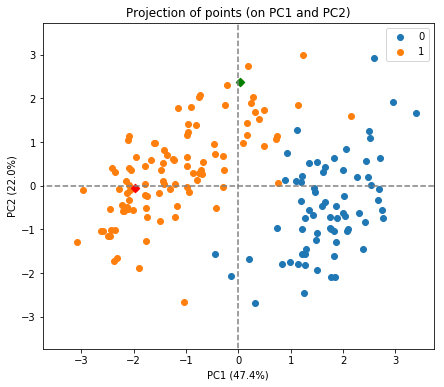

In [35]:
# Visualisation des points les mieux et les moins bien représentés sur l'axe d'inertie secondaire
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, 
                         [(0,1)],
                         illustrative_var = is_genuine)
plt.scatter(X_projected[21,0], X_projected[21,1], marker='D', c='g')
plt.scatter(X_projected[2,0], X_projected[2,1], marker='D', c='r')
                          
plt.savefig('fig17.jpeg')

#### Qualité de la représentation de l'ensemble des billets sur le 1er plan factoriel

In [75]:
qualreptop.describe()

,is_genuine,COS2_1,COS2_2,qualrep_1er_plan
count,170.000000,170.000000,170.000000,170.000000
mean,0.588235,47.208824,21.497647,68.706471
std,0.493607,27.836505,24.026676,21.359809
min,0.000000,0.000000,0.000000,2.500000
25%,0.000000,23.900000,2.925000,53.175000
50%,1.000000,51.250000,12.550000,73.350000
75%,1.000000,69.800000,36.475000,85.500000
max,1.000000,97.300000,93.600000,98.900000


In [76]:
# Qualité de la représentation des VRAIS billets sur le 1er plan factoriel
qualreptop[qualreptop.is_genuine == True].describe()

,is_genuine,COS2_1,COS2_2,qualrep_1er_plan
count,100.0,100.000000,100.000000,100.000000
mean,1.0,45.515000,22.666000,68.181000
std,0.0,29.628588,25.800987,22.613961
min,1.0,0.000000,0.000000,2.500000
25%,1.0,19.875000,2.650000,52.100000
50%,1.0,51.350000,13.100000,74.050000
75%,1.0,71.825000,36.025000,85.525000
max,1.0,96.200000,93.600000,96.500000


In [77]:
# Qualité de la représentation des FAUX billets sur le 1er plan factoriel
qualreptop[qualreptop.is_genuine == False].describe()

,is_genuine,COS2_1,COS2_2,qualrep_1er_plan
count,70.0,70.000000,70.000000,70.000000
mean,0.0,49.628571,19.828571,69.457143
std,0.0,25.064833,21.307141,19.564094
min,0.0,0.300000,0.000000,11.200000
25%,0.0,31.500000,3.425000,56.200000
50%,0.0,50.650000,10.900000,73.000000
75%,0.0,68.425000,37.875000,85.475000
max,0.0,97.300000,91.900000,98.900000


### Contributions des individus aux axes

Quels sont les individus qui participent le plus à la formation de l’axe ?  
Ce sont les points dont la contribution est supérieure à la moyenne qui permettent de donner un sens à l’axe.  

In [78]:
# Contributions des individus aux axes (CTR)
ctri = X_projected**2
for j in range(p):
    ctri[:,j] = 100 * ctri[:,j]/(n*eigval[j])

ctri_ax = pd.DataFrame(np.around(ctri, 2),
                     index=X.index,
                     columns=['CTR_' + str(i + 1) for i in range(p)]).reset_index()

ctri_ax.head()

,is_genuine,CTR_1,CTR_2,CTR_3,CTR_4,CTR_5,CTR_6
0,1,0.96,1.14,2.20,6.81,1.04,4.89
1,1,0.92,0.12,0.20,0.14,0.01,0.90
2,1,0.80,0.00,0.51,0.16,0.38,0.02
3,1,0.88,0.00,0.19,0.31,0.00,0.00
4,1,1.19,0.08,7.59,0.81,0.38,0.60


In [79]:
# Vérification que les sommes en colonne sont bien égale à 1 (*100)
np.sum(ctri_ax,axis=0)

is_genuine    100.00
CTR_1         100.02
CTR_2         100.01
CTR_3         100.04
CTR_4         100.07
CTR_5         100.00
CTR_6         100.01
dtype: float64

In [80]:
# Les individus avec la plus grande contribution sur le 1er axe
ctri_ax['CTR_1'].sort_values(ascending = False).head()

122    2.38
49     1.96
29     1.81
112    1.80
158    1.58
Name: CTR_1, dtype: float64

In [81]:
# Les individus avec la moins grande contribution sur le 1er axe
ctri_ax['CTR_1'].sort_values().head()

152    0.00
27     0.00
21     0.00
25     0.01
53     0.01
Name: CTR_1, dtype: float64

In [82]:
# Les individus avec la plus grande contribution sur le 2d axe
ctri_ax['CTR_2'].sort_values(ascending = False).head()

5      3.97
166    3.79
34     3.33
156    3.23
70     3.15
Name: CTR_2, dtype: float64

In [83]:
# Les individus avec la moins grande contribution sur le 2d axe
ctri_ax['CTR_2'].sort_values().head()

29     0.0
46     0.0
47     0.0
35     0.0
124    0.0
Name: CTR_2, dtype: float64

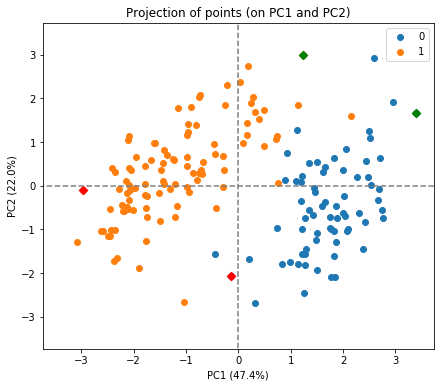

In [29]:
# Contribution des individus: visualisation sur le 1er plan factoriel
display_factorial_planes(X_projected, n_comp, pca, 
                         [(0,1)],
                         illustrative_var = is_genuine)
plt.scatter(X_projected[122,0], X_projected[122,1], marker='D', c='g') # plus grande contribution sur le 1er axe
plt.scatter(X_projected[5,0], X_projected[5,1], marker='D', c='g') # plus grande contribution sur le 2d axe
plt.scatter(X_projected[152,0], X_projected[152,1], marker='D', c='r') # une des moins grandes contribution sur le 1er axe
plt.scatter(X_projected[29,0], X_projected[29,1], marker='D', c='r') # une des moins grandes contribution sur le 2d axe
                          
# plt.savefig('fig18.jpeg')

<a id='Mission 2'></a>

[Haut de page](#Mission 0)  

# <font color='#FFCA36'>Mission 2 : K-means clustering</font>

Appliquer un algorithme de classification, puis analyser le résultat obtenu.  
Visualiser la partition obtenue dans le premier plan factoriel de l'ACP, puis l'analyser.

cf. https://openclassrooms.com/fr/courses/5869986-perform-an-exploratory-data-analysis/6177861-analyze-the-results-of-a-k-means-clustering

In [11]:
# Pour le kmeans (cf.https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
from sklearn.cluster import KMeans

Text(0.5,1,'Elbow Curve')

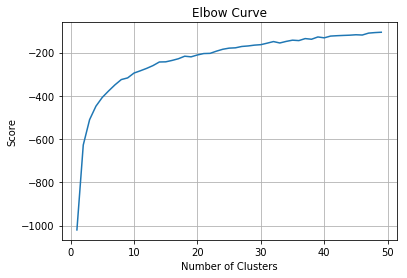

In [87]:
# Elbow curve pour voir, puisque de toute façon ici le nb de clusters sera = à 2 car genuine True or False
num_clusters = 50
kmeans_tests = [KMeans(n_clusters=i, init='random', n_init=10) for i in range(1, num_clusters)]
score = [kmeans_tests[i].fit(X_scaled).score(X_scaled) for i in range(len(kmeans_tests))]

# Plot the curve
plt.plot(range(1, num_clusters),score)
plt.grid()
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')

# plt.savefig('fig19.jpeg')

Le nombre de cluster idéal se situe à 5 environ. 

#### Clustering par k-means

In [12]:
# Création du modèle
km = KMeans(n_clusters = 2) # n_clusters=2 car genuine True or False

# Fit des données au modèle. Ici, 
# pas forcément besoin de prendre X_scaled étant donné que les valeurs ont la même unité (le mm). 
km.fit(X) #  

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

#### Affichage du clustering par projection des individus sur le premier plan factoriel

In [13]:
# Récupération des clusters attribués à chaque individu
kmclusters = km.labels_
kmclusters
# # Autre solution possible : 
# kmeans.predict(X_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Text(0.5,1,'Projection des 170 individus sur le 1e plan factoriel')

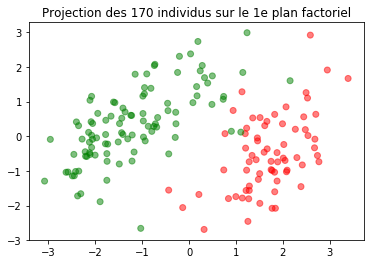

In [18]:
# Projection des individus sur le 1er plan factoriel, cf.
# https://openclassrooms.com/fr/courses/4525281-realisez-une-analyse-exploratoire-de-donnees/5345241-tp-partitionnez-vos-donnees
from matplotlib import colors 
plt.scatter(
    X_projected[:, 0], X_projected[:, 1], 
    cmap = colors.ListedColormap(['r', 'g']), 
    c = kmclusters.astype(np.float), 
    alpha=.5
)
plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_projected.shape[0]))
# plt.show(block=False)

# plt.savefig('fig20.jpeg')

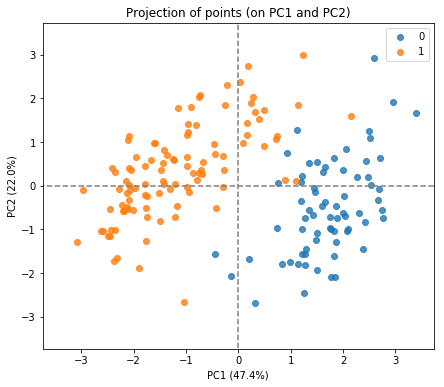

In [19]:
# On peut aussi faire la projection sur le même plan que l'ACP
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], illustrative_var = kmclusters, alpha = 0.8)

# plt.savefig('fig21.jpeg')

##### Visualisons les faux positifs et les faux négatifs

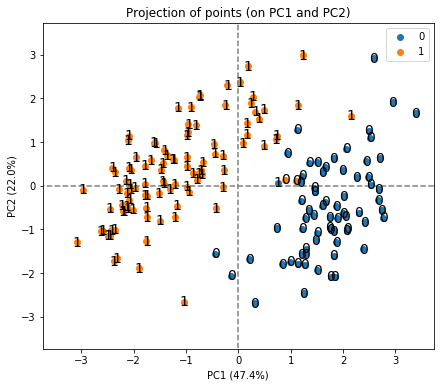

In [17]:
# Projection des individus sur le 1er plan factoriel avec visualisation des faux positifs et des faux négatifs
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], illustrative_var = kmclusters, labels = is_genuine)

# plt.savefig('fig22.jpeg')

#### Matrice de confusion

In [81]:
# On peut utiliser confusion_matrix
from sklearn.metrics import confusion_matrix as cm

In [88]:
# Voir par ex. https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html)
km_matrix = cm(X.index, kmclusters)
km_matrix = pd.DataFrame(km_matrix)
km_matrix

,0,1
0,68,2
1,1,99


In [89]:
# Calcul de la justesse du clustering (prévisions correctes / totalité des prévisions)
accuracy  = (km_matrix.iloc[0,0] + km_matrix.iloc[1,1]) / (km_matrix.iloc[:].sum().sum())
print(f"clustering accuracy : {accuracy:.2%}")

clustering accuracy : 98.24%


Text(0.5,257.44,'Prédiction')

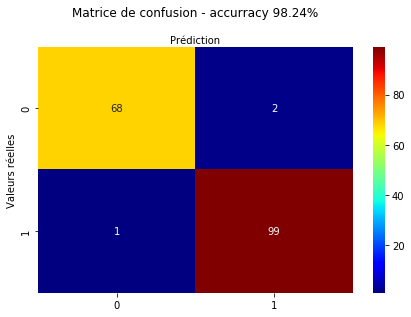

In [91]:
# # Heatmap
# class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
# figsize = (3,3)
# tick_marks = np.arange(len(class_names))
# plt.xticks(tick_marks, class_names)
# plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(km_matrix), annot=True, cmap="jet")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matrice de confusion - accurracy {}'.format(f'{accuracy:.2%}'), y=1.1)
plt.ylabel('Valeurs réelles')
plt.xlabel('Prédiction')

# plt.savefig('fig23.jpeg')

Ce que l'on observe sur la matrice :

- TP = True Positives = 99
- TN = True Negatives = 68
- FP = False Positives = 1
- FN = False Negatives = 2

---

##### --- [Tests]  Autres solutions possibles pour obtenir la matrice de confusion et la visualisation des faux + et - ---

In [40]:
# On peut obtenir la mdc avec crosstab (cf. https://datatofish.com/logistic-regression-python/)
mdc2 = pd.crosstab(X.index, kmclusters) 
mdc2.index = ['Faux','Vrais']
mdc2.columns = ['Predict 0','Predict 1']
mdc2

,Predict 0,Predict 1
Faux,68,2
Vrais,1,99


##### Visualisons les faux positifs et les faux négatifs

In [18]:
# Copie de l'array clusters en vue de sa modification
kmclusters_c = kmclusters.copy()
kmclusters_c

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [23]:
# Ajout des clusters obtenus via K-means au df principal
X_km = pd.DataFrame(X, columns=X.columns, index=X.index)
X_km['cluster'] = kmclusters_c
X_km.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,cluster
is_genuine,,,,,,,
1,171.81,104.86,104.95,4.52,2.89,112.83,1
1,171.67,103.74,103.70,4.01,2.87,113.29,1
1,171.83,103.76,103.76,4.40,2.88,113.84,1
1,171.80,103.78,103.65,3.73,3.12,113.63,1
1,172.05,103.70,103.75,5.04,2.27,113.55,1


In [19]:
# Je créé d'autres "clusters" pour les faux positifs et faux négatifs
# (probablement y a-t-il une solution plus pythonique mais je ne l'ai pas trouvée - ou c'est trop long) 
kmclusters_c[69] = 2
kmclusters_c[102] = 3
kmclusters_c[118] = 3

In [20]:
# Vérification
kmclusters_c

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Text(0.5,1,'Projection des 170 individus sur le 1e plan factoriel')

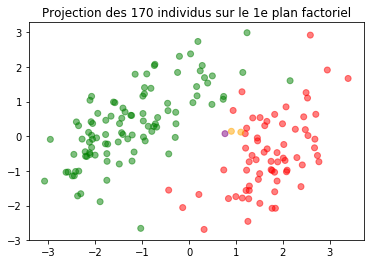

In [21]:
# Projection
plt.scatter(
    X_projected[:, 0], X_projected[:, 1],
    cmap = colors.ListedColormap(['r', 'g', 'purple', 'orange']), 
    c = kmclusters_c.astype(np.float),
    alpha = .5
)
plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_projected.shape[0]))
# plt.show()
# plt.savefig('fig24.jpeg')

---

#### Ajout des composantes principales dans le df principal

In [164]:
billets2 = billets.copy()

In [165]:
billets2['PC1'] = X_projected[:,0]
billets2['PC2'] = X_projected[:,1]
billets2.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,PC1,PC2
0,True,171.81,104.86,104.95,4.52,2.89,112.83,2.153639,1.599709
1,True,171.67,103.74,103.70,4.01,2.87,113.29,-2.110416,-0.526039
2,True,171.83,103.76,103.76,4.40,2.88,113.84,-1.973152,-0.048102
3,True,171.80,103.78,103.65,3.73,3.12,113.63,-2.059795,-0.089105
4,True,172.05,103.70,103.75,5.04,2.27,113.55,-2.403180,0.412170


---

<a id='Mission 3'></a>

[Haut de page](#Mission 0)  

# <font color='#FFCA36'>Mission 3 : régression logistique</font>

Modéliser les données à l'aide d'une régression logistique. Grâce à celle-ci, créer un programme capable d'effectuer une prédiction sur un billet, c'est-à-dire de déterminer s'il s'agit d'un vrai ou d'un faux billet. Pour chaque billet, l'algorithme de classification devra donner la probabilité que le billet soit vrai. Si cette probabilité est supérieure ou égale à 0.5, le billet sera considéré comme vrai. Dans le cas contraire, il sera considéré comme faux.

cf. 
- https://openclassrooms.com/fr/courses/5873596-design-effective-statistical-models-to-understand-your-data/6233016-build-and-interpret-a-logistic-regression-model
- https://openclassrooms.com/fr/courses/4525326-realisez-des-modelisations-de-donnees-performantes/5754152-tp-pratiquez-la-regression-logistique-sur-le-jeu-de-donnees-des-maladies-cardio-vasculaires
- https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python
- http://eric.univ-lyon2.fr/~ricco/tanagra/fichiers/fr_Tanagra_Python_Regression_Logistique.pdf

##### --- Pour voir, pour commencer, régression logistique d'une des variables  ---

In [76]:
test = billets.copy()

In [77]:
test.length.describe()

count    170.000000
mean     112.570412
std        0.924448
min      109.970000
25%      111.855000
50%      112.845000
75%      113.287500
max      113.980000
Name: length, dtype: float64

In [78]:
test = test[['is_genuine', 'length']]

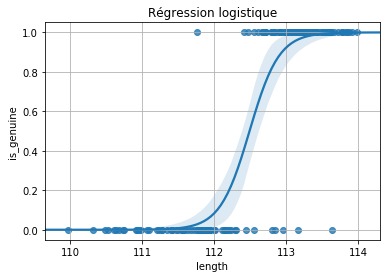

In [82]:
sns.regplot(x = 'length', y = 'is_genuine', data=test, logistic=True)
plt.title('Régression logistique')
plt.grid()
plt.savefig('fig25.jpeg')

---

## Préparation du modèle

In [3]:
from sklearn.linear_model import LogisticRegression
# Pour les tests
from sklearn.model_selection import train_test_split
# # Pour la matrice de confusion
from sklearn import metrics

In [78]:
## Plus simple avec sklearn qu'avec statsmodel
# import statsmodels.formula.api as smf
# import statsmodels.api as sm

In [4]:
# Pour mémoire
billets.head(1)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83


In [5]:
# J'isole la variable cible (y) et les explicatives potentielles (X) dans deux structures distinctes.
# variable à expliquer
y = billets.is_genuine 
# variables explicatives
X = billets.iloc[:,1:] 

In [6]:
# Comptage des modalités de y
print(y.value_counts())

True     100
False     70
Name: is_genuine, dtype: int64


In [7]:
# Partition aléatoire du jeu de données en 70% pour créer le modèle, 30% pour tester le modèle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [8]:
# On lance le modèle sur notre jeu de test
# For small datasets, ‘liblinear’ is a good choice
logreg = LogisticRegression(solver = 'liblinear')  
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
# Stockage des prédictions
y_pred = logreg.predict(X_test)

In [33]:
# exactitude(vp + vn / T)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.98


## Evaluation du modèle

In [34]:
# Matrice de confusion
reg_matrix = metrics.confusion_matrix(y_test, y_pred)
reg_matrix = pd.DataFrame(reg_matrix, index = ['Faux','Vrais'], columns = ['Predict 0','Predict 1'])
reg_matrix

,Predict 0,Predict 1
Faux,13,0
Vrais,1,37


In [35]:
print(f"{reg_matrix.iloc[0,0]} et {reg_matrix.iloc[1,1]} est le nombre de prédictions correctes.")
print(f"{reg_matrix.iloc[1,0]} et {reg_matrix.iloc[0,1]} est le nombre de prédictions incorrectes.")

13 et 37 est le nombre de prédictions correctes.
1 et 0 est le nombre de prédictions incorrectes.


In [36]:
# exactitude (ratio of the number of correct predictions to the total number of predictions (or observations))
accurracy_mc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accurracy_mc) 

Accuracy: 0.9803921568627451


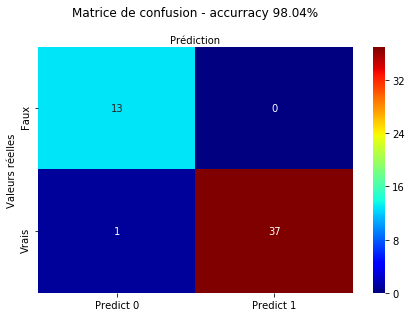

In [41]:
# # Heatmap
# class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
# figsize = (5,5)
# tick_marks = np.arange(len(class_names))
# plt.xticks(tick_marks, class_names)
# plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(reg_matrix), annot=True, cmap='jet')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matrice de confusion - accurracy {}'.format(f'{metrics.accuracy_score(y_test, y_pred):.2%}'), y=1.1)
plt.ylabel('Valeurs réelles')
plt.xlabel('Prédiction')

plt.savefig('fig26.jpeg')

In [38]:
# https://pathmind.com/wiki/accuracy-precision-recall-f1)
# cf. https://en.wikipedia.org/wiki/Precision_and_recall

# precision : tp / (tp + fp) 
print("Precision:",metrics.precision_score(y_test, y_pred)) 

# recall : tp / (tp + fn)
print("Recall:",metrics.recall_score(y_test, y_pred)) 

Precision: 1.0
Recall: 0.9736842105263158


In [39]:
# cf. https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

      False       0.93      1.00      0.96        13
       True       1.00      0.97      0.99        38

avg / total       0.98      0.98      0.98        51



**Notes :**  
Plus le f1-score est proche de 1, mieux c'est.   
Support : nombre d'occurrences de chaque classe dans y_pred.

## ROC curve

Receiver Operating Characteristic(ROC) curve.  
Graphiquement, on représente souvent la mesure ROC sous la forme d'une courbe qui donne le taux de vrais positifs (fraction des positifs qui sont effectivement détectés) en fonction du taux de faux positifs (fraction des négatifs qui sont incorrectement détectés).

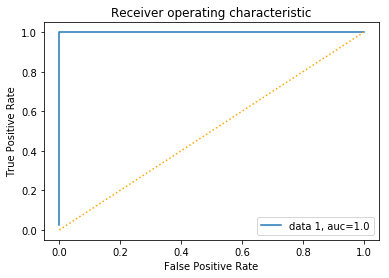

In [42]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='orange', linestyle=':')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc=4)

# plt.savefig('fig27.jpeg')

AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.  
The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

## Détermination de la validité de billets

In [9]:
# Import de l'exemple
expl = pd.read_csv("C:/Users/Zang/Documents/APPRENDER/OPENCLASSROOMS/PARCOURS DA/P6_Detectez_des_faux_billets/example.csv")
expl

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [44]:
# expL = exp[['margin_up', 'margin_low', 'height_left', 'height_right', 'length', 'diagonal', 'id']]

In [10]:
# Je prépare les données en retirant la colonne id
X_expl = expl.iloc[:,:-1]

In [11]:
# Application du modèle
y_predexpl = logreg.predict(X_expl)

In [12]:
# Prévision
y_predexpl

array([False, False, False,  True,  True])

In [13]:
# J'ajoute le résultat du test dans le df
expl['validité du billet'] = y_predexpl
expl

,diagonal,height_left,height_right,margin_low,margin_up,length,id,validité du billet
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,False
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,False
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,False
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,True
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,True


In [14]:
# Calcul des probabilités d'affectation
proba_validX = logreg.predict_proba(X_expl)
proba_validX

array([[0.95129013, 0.04870987],
       [0.98678394, 0.01321606],
       [0.96320665, 0.03679335],
       [0.15683893, 0.84316107],
       [0.00674015, 0.99325985]])

In [15]:
# Ajout des probas d'affectation au df
expl['proba_billet_faux'] = proba_validX[:,0]
expl['proba_billet_vrai'] = proba_validX[:,1]
expl

,diagonal,height_left,height_right,margin_low,margin_up,length,id,validité du billet,proba_billet_faux,proba_billet_vrai
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,False,0.951290,0.048710
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,False,0.986784,0.013216
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,False,0.963207,0.036793
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,True,0.156839,0.843161
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,True,0.006740,0.993260


In [16]:
for i in range(expl.shape[0]):
    prev = 'Le résultat du test proba pour le billet ' + str(expl.iloc[i,6]) + ' est: ' + str(expl.iloc[i,7])
    print(prev)

Le résultat du test proba pour le billet A_1 est: False
Le résultat du test proba pour le billet A_2 est: False
Le résultat du test proba pour le billet A_3 est: False
Le résultat du test proba pour le billet A_4 est: True
Le résultat du test proba pour le billet A_5 est: True


### En résumé

In [118]:
# On commence par charger les données
expl = pd.read_csv("C:/Users/Zang/Documents/APPRENDER/OPENCLASSROOMS/PARCOURS DA/P6_Detectez_des_faux_billets/example.csv")

# Je prépare les données en retirant la colonne id
X_expl = expl.iloc[:,:-1]

# Attention, il faut repartir de logreg
logreg --> voir plus haut

# Application du modèle
y_predexpl = logreg.predict(X_expl)
y_predexpl

array([False, False, False,  True,  True])

---

# My_test

Un fichier que j'ai créé pour tester mon programme. 

In [30]:
# Import de mon fichier test
myt = pd.read_csv("C:/Users/Zang/Documents/APPRENDER/OPENCLASSROOMS/PARCOURS DA/P6_Detectez_des_faux_billets/my_test.csv")

In [124]:
logreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [231]:
myt.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,id,TF
0,171.81,104.86,104.95,4.52,2.89,112.83,A_1,True
1,171.67,103.74,103.70,3.77,3.16,113.33,A_2,True
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,False
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,True
4,170.65,103.63,103.56,3.77,3.16,110.33,A_5,False


In [233]:
# Je prépare les données en retirant les 2 dernières colonnes
X_myt = myt.iloc[:,:-2]

In [234]:
# Application du modèle
y_predmyt = logreg.predict(X_myt)

In [235]:
# Prévision
y_predmyt

array([False,  True, False,  True, False])

In [236]:
# Calcul des probabilités d'affectation
proba_valid_myt = logreg.predict_proba(X_myt)
proba_valid_myt

array([[0.52798666, 0.47201334],
       [0.00871541, 0.99128459],
       [0.9624617 , 0.0375383 ],
       [0.17458151, 0.82541849],
       [0.63731055, 0.36268945]])

In [237]:
# J'ajoute le résultat du test dans le df
X_myt['validité du billet'] = y_predmyt

In [238]:
X_myt

,diagonal,height_left,height_right,margin_low,margin_up,length,validité du billet
0,171.81,104.86,104.95,4.52,2.89,112.83,False
1,171.67,103.74,103.70,3.77,3.16,113.33,True
2,172.00,104.58,104.29,4.99,3.39,111.57,False
3,172.49,104.55,104.34,4.44,3.03,113.20,True
4,170.65,103.63,103.56,3.77,3.16,110.33,False


In [239]:
# Ajout des probas d'affectation au df
X_myt['proba_billet_faux'] = proba_valid_myt[:,0]
X_myt['proba_billet_vrai'] = proba_valid_myt[:,1]
X_myt

,diagonal,height_left,height_right,margin_low,margin_up,length,validité du billet,proba_billet_faux,proba_billet_vrai
0,171.81,104.86,104.95,4.52,2.89,112.83,False,0.527987,0.472013
1,171.67,103.74,103.70,3.77,3.16,113.33,True,0.008715,0.991285
2,172.00,104.58,104.29,4.99,3.39,111.57,False,0.962462,0.037538
3,172.49,104.55,104.34,4.44,3.03,113.20,True,0.174582,0.825418
4,170.65,103.63,103.56,3.77,3.16,110.33,False,0.637311,0.362689


# Prépa test validation projet

In [230]:
# Import du test
val = pd.read_csv("C:/Users/Zang/Documents/APPRENDER/OPENCLASSROOMS/PARCOURS DA/P6_Detectez_des_faux_billets/test_v.csv")

In [124]:
"""logreg à récupérer"""

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [231]:
val.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,id,TF
0,171.81,104.86,104.95,4.52,2.89,112.83,A_1,True
1,171.67,103.74,103.70,3.77,3.16,113.33,A_2,True
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,False
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,True
4,170.65,103.63,103.56,3.77,3.16,110.33,A_5,False


In [233]:
# Je prépare les données en retirant la colonne id
X_val = val.iloc[:,:-1]

In [234]:
# Application du modèle
y_pred_val = logreg.predict(X_val)

In [235]:
# Prévision
y_pred_val

array([False,  True, False,  True, False])

In [236]:
# Calcul des probabilités d'affectation
proba_valid_val = logreg.predict_proba(X_val)
proba_valid_val

array([[0.52798666, 0.47201334],
       [0.00871541, 0.99128459],
       [0.9624617 , 0.0375383 ],
       [0.17458151, 0.82541849],
       [0.63731055, 0.36268945]])

In [237]:
# J'ajoute le résultat du test dans le df
X_val['validité du billet'] = y_pred_val

In [238]:
X_val

,diagonal,height_left,height_right,margin_low,margin_up,length,validité du billet
0,171.81,104.86,104.95,4.52,2.89,112.83,False
1,171.67,103.74,103.70,3.77,3.16,113.33,True
2,172.00,104.58,104.29,4.99,3.39,111.57,False
3,172.49,104.55,104.34,4.44,3.03,113.20,True
4,170.65,103.63,103.56,3.77,3.16,110.33,False


In [239]:
# Ajout des probas d'affectation au df
X_val['proba_billet_faux'] = proba_valid_val[:,0]
X_val['proba_billet_vrai'] = proba_valid_val[:,1]
X_val

,diagonal,height_left,height_right,margin_low,margin_up,length,validité du billet,proba_billet_faux,proba_billet_vrai
0,171.81,104.86,104.95,4.52,2.89,112.83,False,0.527987,0.472013
1,171.67,103.74,103.70,3.77,3.16,113.33,True,0.008715,0.991285
2,172.00,104.58,104.29,4.99,3.39,111.57,False,0.962462,0.037538
3,172.49,104.55,104.34,4.44,3.03,113.20,True,0.174582,0.825418
4,170.65,103.63,103.56,3.77,3.16,110.33,False,0.637311,0.362689
